Training with SGD optimizer...
Training with Adam optimizer...
Training with RMSprop optimizer...


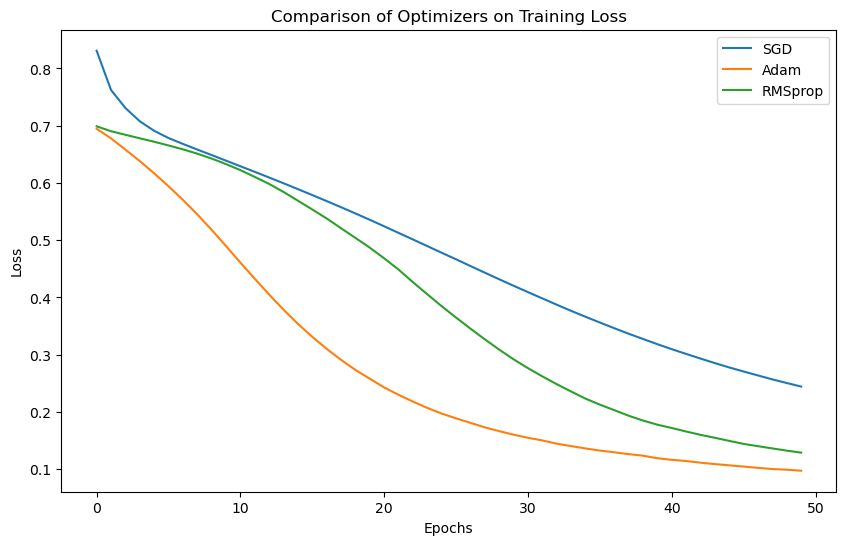

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
x_train = np.random.rand(1000, 2)
y_train = (x_train[:, 0] + x_train[:, 1] > 1).astype(int)  # Simple decision boundary

# Define a simple neural network model
def create_model(optimizer):
    model = keras.Sequential([
        layers.Dense(8, activation='relu', input_shape=(2,)),
        layers.Dense(4, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Compare different optimizers
optimizers = {
    "SGD": keras.optimizers.SGD(),
    "Adam": keras.optimizers.Adam(),
    "RMSprop": keras.optimizers.RMSprop()
}

history_records = {}

for opt_name, opt in optimizers.items():
    print(f"Training with {opt_name} optimizer...")
    model = create_model(opt)
    history = model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0)
    history_records[opt_name] = history

# Plot training loss for each optimizer
plt.figure(figsize=(10, 6))
for opt_name, history in history_records.items():
    plt.plot(history.history['loss'], label=opt_name)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparison of Optimizers on Training Loss')
plt.legend()
plt.show()

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7527 - loss: 0.7729 - val_accuracy: 0.9499 - val_loss: 0.1634
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9192 - loss: 0.2746 - val_accuracy: 0.9575 - val_loss: 0.1364
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9319 - loss: 0.2339 - val_accuracy: 0.9657 - val_loss: 0.1170
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9389 - loss: 0.2059 - val_accuracy: 0.9681 - val_loss: 0.1104
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9445 - loss: 0.1913 - val_accuracy: 0.9703 - val_loss: 0.1032
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9466 - loss: 0.1798 - val_accuracy: 0.9709 - val_loss: 0.1002
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9512 - loss: 0.1670 - val_accuracy: 0.9754 - val_loss: 0.0861
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9529 - loss: 0.1587 - 

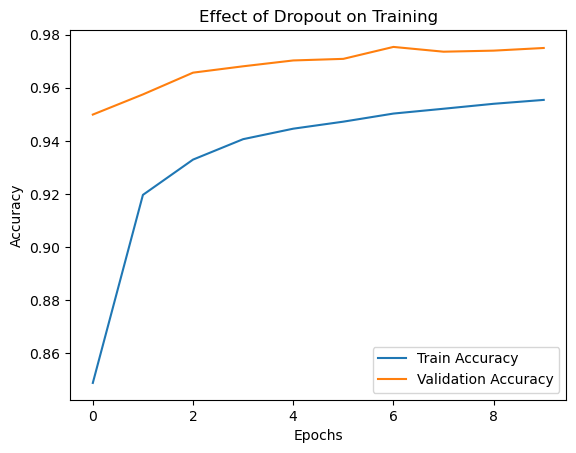

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST dataset (handwritten digits)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten images from 28x28 to 784
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the model with Dropout
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.5),  # Dropout with 50% probability
    layers.Dense(64, activation='relu'),  # Add another hidden layer
    layers.Dropout(0.3),  # Dropout with 30% probability
    layers.Dense(10, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Effect of Dropout on Training')
plt.legend()
plt.show()

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8706 - loss: 0.4407 - val_accuracy: 0.9638 - val_loss: 0.1237
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9679 - loss: 0.1079 - val_accuracy: 0.9686 - val_loss: 0.1005
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9781 - loss: 0.0694 - val_accuracy: 0.9687 - val_loss: 0.0965
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9841 - loss: 0.0504 - val_accuracy: 0.9749 - val_loss: 0.0783
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9877 - loss: 0.0382 - val_accuracy: 0.9742 - val_loss: 0.0866
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9907 - loss: 0.0307 - val_accuracy: 0.9749 - val_loss: 0.0915
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9909 - loss: 0.0272 - val_accuracy: 0.9795 - val_loss: 0.0757
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9929 - loss: 0.0217 - 

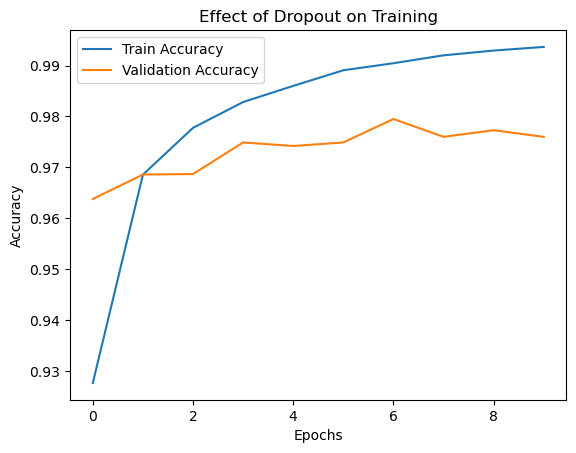

In [ ]:
# Load MNIST dataset (handwritten digits)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten images from 28x28 to 784
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the model without Dropout
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),  # Add another hidden layer
    layers.Dense(10, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Effect of Dropout on Training')
plt.legend()
plt.show()

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8560 - loss: 1.1693 - val_accuracy: 0.9310 - val_loss: 0.4828
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9267 - loss: 0.4797 - val_accuracy: 0.9401 - val_loss: 0.4075
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9367 - loss: 0.4151 - val_accuracy: 0.9431 - val_loss: 0.3803
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9444 - loss: 0.3738 - val_accuracy: 0.9499 - val_loss: 0.3451
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9482 - loss: 0.3426 - val_accuracy: 0.9452 - val_loss: 0.3467
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9504 - loss: 0.3277 - val_accuracy: 0.9484 - val_loss: 0.3265
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9493 - loss: 0.3154 - val_accuracy: 0.9521 - val_loss: 0.3088
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9527 - loss: 0.3040 - 

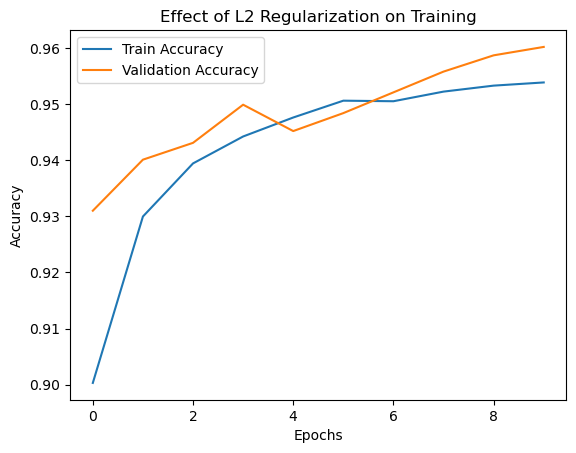

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST dataset (handwritten digits)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten images from 28x28 to 784
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the model with L2 Regularization
model = models.Sequential([
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(784,)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.005)),  # Additional hidden layer with L2
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Effect of L2 Regularization on Training')
plt.legend()
plt.show()

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8764 - loss: 0.4263 - val_accuracy: 0.9596 - val_loss: 0.1346
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9665 - loss: 0.1099 - val_accuracy: 0.9702 - val_loss: 0.0939
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9787 - loss: 0.0688 - val_accuracy: 0.9690 - val_loss: 0.0989
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9835 - loss: 0.0506 - val_accuracy: 0.9730 - val_loss: 0.0904
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9863 - loss: 0.0428 - val_accuracy: 0.9736 - val_loss: 0.0836
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9891 - loss: 0.0331 - val_accuracy: 0.9750 - val_loss: 0.0899
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9919 - loss: 0.0251 - val_accuracy: 0.9781 - val_loss: 0.0779
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9929 - loss: 0.0227 - 

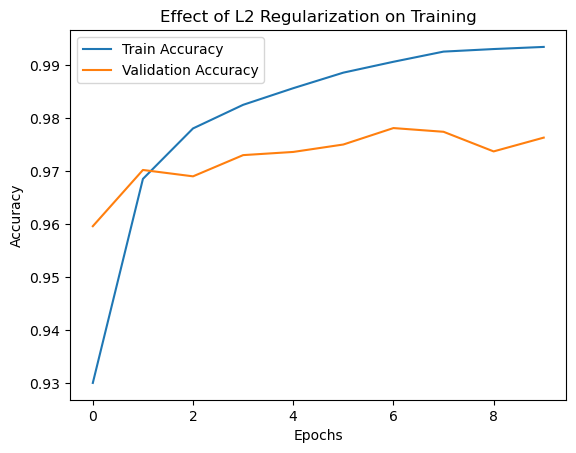

In [7]:
# Load MNIST dataset (handwritten digits)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten images from 28x28 to 784
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the model with L2 Regularization
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),  # Additional hidden layer with L2
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Effect of L2 Regularization on Training')
plt.legend()
plt.show()


In [ ]:
# dataset CIFAR 10
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 93s 1us/step


In [ ]:
# Define the model 
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),  # Conv2D au lieu de Flatten
    layers.MaxPooling2D((2,2)),  # Pooling pour réduire la taille de l'image
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),  # Maintenant, on aplati avant de passer aux couches denses
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes pour CIFAR-10
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Compilation du modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraînement
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Affichage des courbes d'apprentissage
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Model')
plt.legend()
plt.show()

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 60000
'y' sizes: 50000


In [10]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (60000, 784)
y_train shape: (50000, 10)
x_test shape: (10000, 784)
y_test shape: (10000, 10)
